## 1) Introduction

The problem is to determine whether a patient referred to the clinic is hypothyroid. We need to make use of machine learning approaches to predict is this patient is sick or can come back to home. We will use the dataset from UCI (https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease). We are going to use pandas and numpy packages to have a defined structure and may solve this analytical problem.

In [96]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('C:/Users/alex_/Desktop/college/DS630-MachineLear/ann-train.data',header=None,delimiter=' ',prefix='X')

df=df.drop('X22', axis=1)
df=df.drop('X23', axis=1)
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


We dropped the last two columns because they contained garbage. Now, looking at the dataset description, we know that three classes are built: normal (not hypothyroid), hyperfunction and subnormal functioning. Let's take a look using of the statistical inferences we can make in the dataset.

## 2) Data Preprocessing

We realized we don't have the name and meaning of each feature so we can't group our dataset and we can't drop any column beacuse we are losing some valuable information. So, in the process of our analysis we will know the importance of our features to predict the values we want.

We will look at our dataset if we are dealing with missing values and also to know some statistical information that it will be useful to preprocess our data, previous to make our machine learning models.

In [97]:
df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.515102,0.303022,0.123277,0.012990,0.011400,0.038441,0.014051,0.014316,0.015111,0.062036,...,0.008749,0.025186,0.000265,0.049311,0.004761,0.020191,0.108286,0.099288,0.110154,2.900053
std,0.189525,0.459626,0.328798,0.113248,0.106174,0.192284,0.117716,0.118806,0.122012,0.241253,...,0.093137,0.156709,0.016282,0.216545,0.023308,0.007421,0.034488,0.018612,0.033493,0.373236
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.019000,0.002000,1.000000
25%,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000600,0.017000,0.089000,0.089000,0.093000,3.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001600,0.020600,0.105500,0.099000,0.108000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002400,0.023000,0.123000,0.107000,0.122000,3.000000
max,0.940000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.530000,0.105900,0.430000,0.232000,0.612000,3.000000


In [98]:
y= df.iloc[:, 21].values
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{1: 93, 2: 191, 3: 3488}


All the values are in the range from 0 to 1. Also, we can see that last column (the target feature) contains 3 values, so we can group up and convert them in 2 values. So we supposed by the amount of values in the 3rd group, they are the people who are healthy. Because our approach is to recognize people who are sick, it doesn't matter if they have hyperfunction and subnormal functioning, so we are going to join together the first two groups.

In [99]:
df['X21'] = df['X21'].map({3: 0, 2: 1, 1:1})
X = df.iloc[:,0:21].values
y= df.iloc[:, 21].values

In [100]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3488, 1: 284}


In [101]:
#Percentage of sick people
284/(3488+284)

0.07529162248144221

The amount of sick people are pretty low. From now, we are going to name them as outliers. Now, we will see the correlation of our variables.

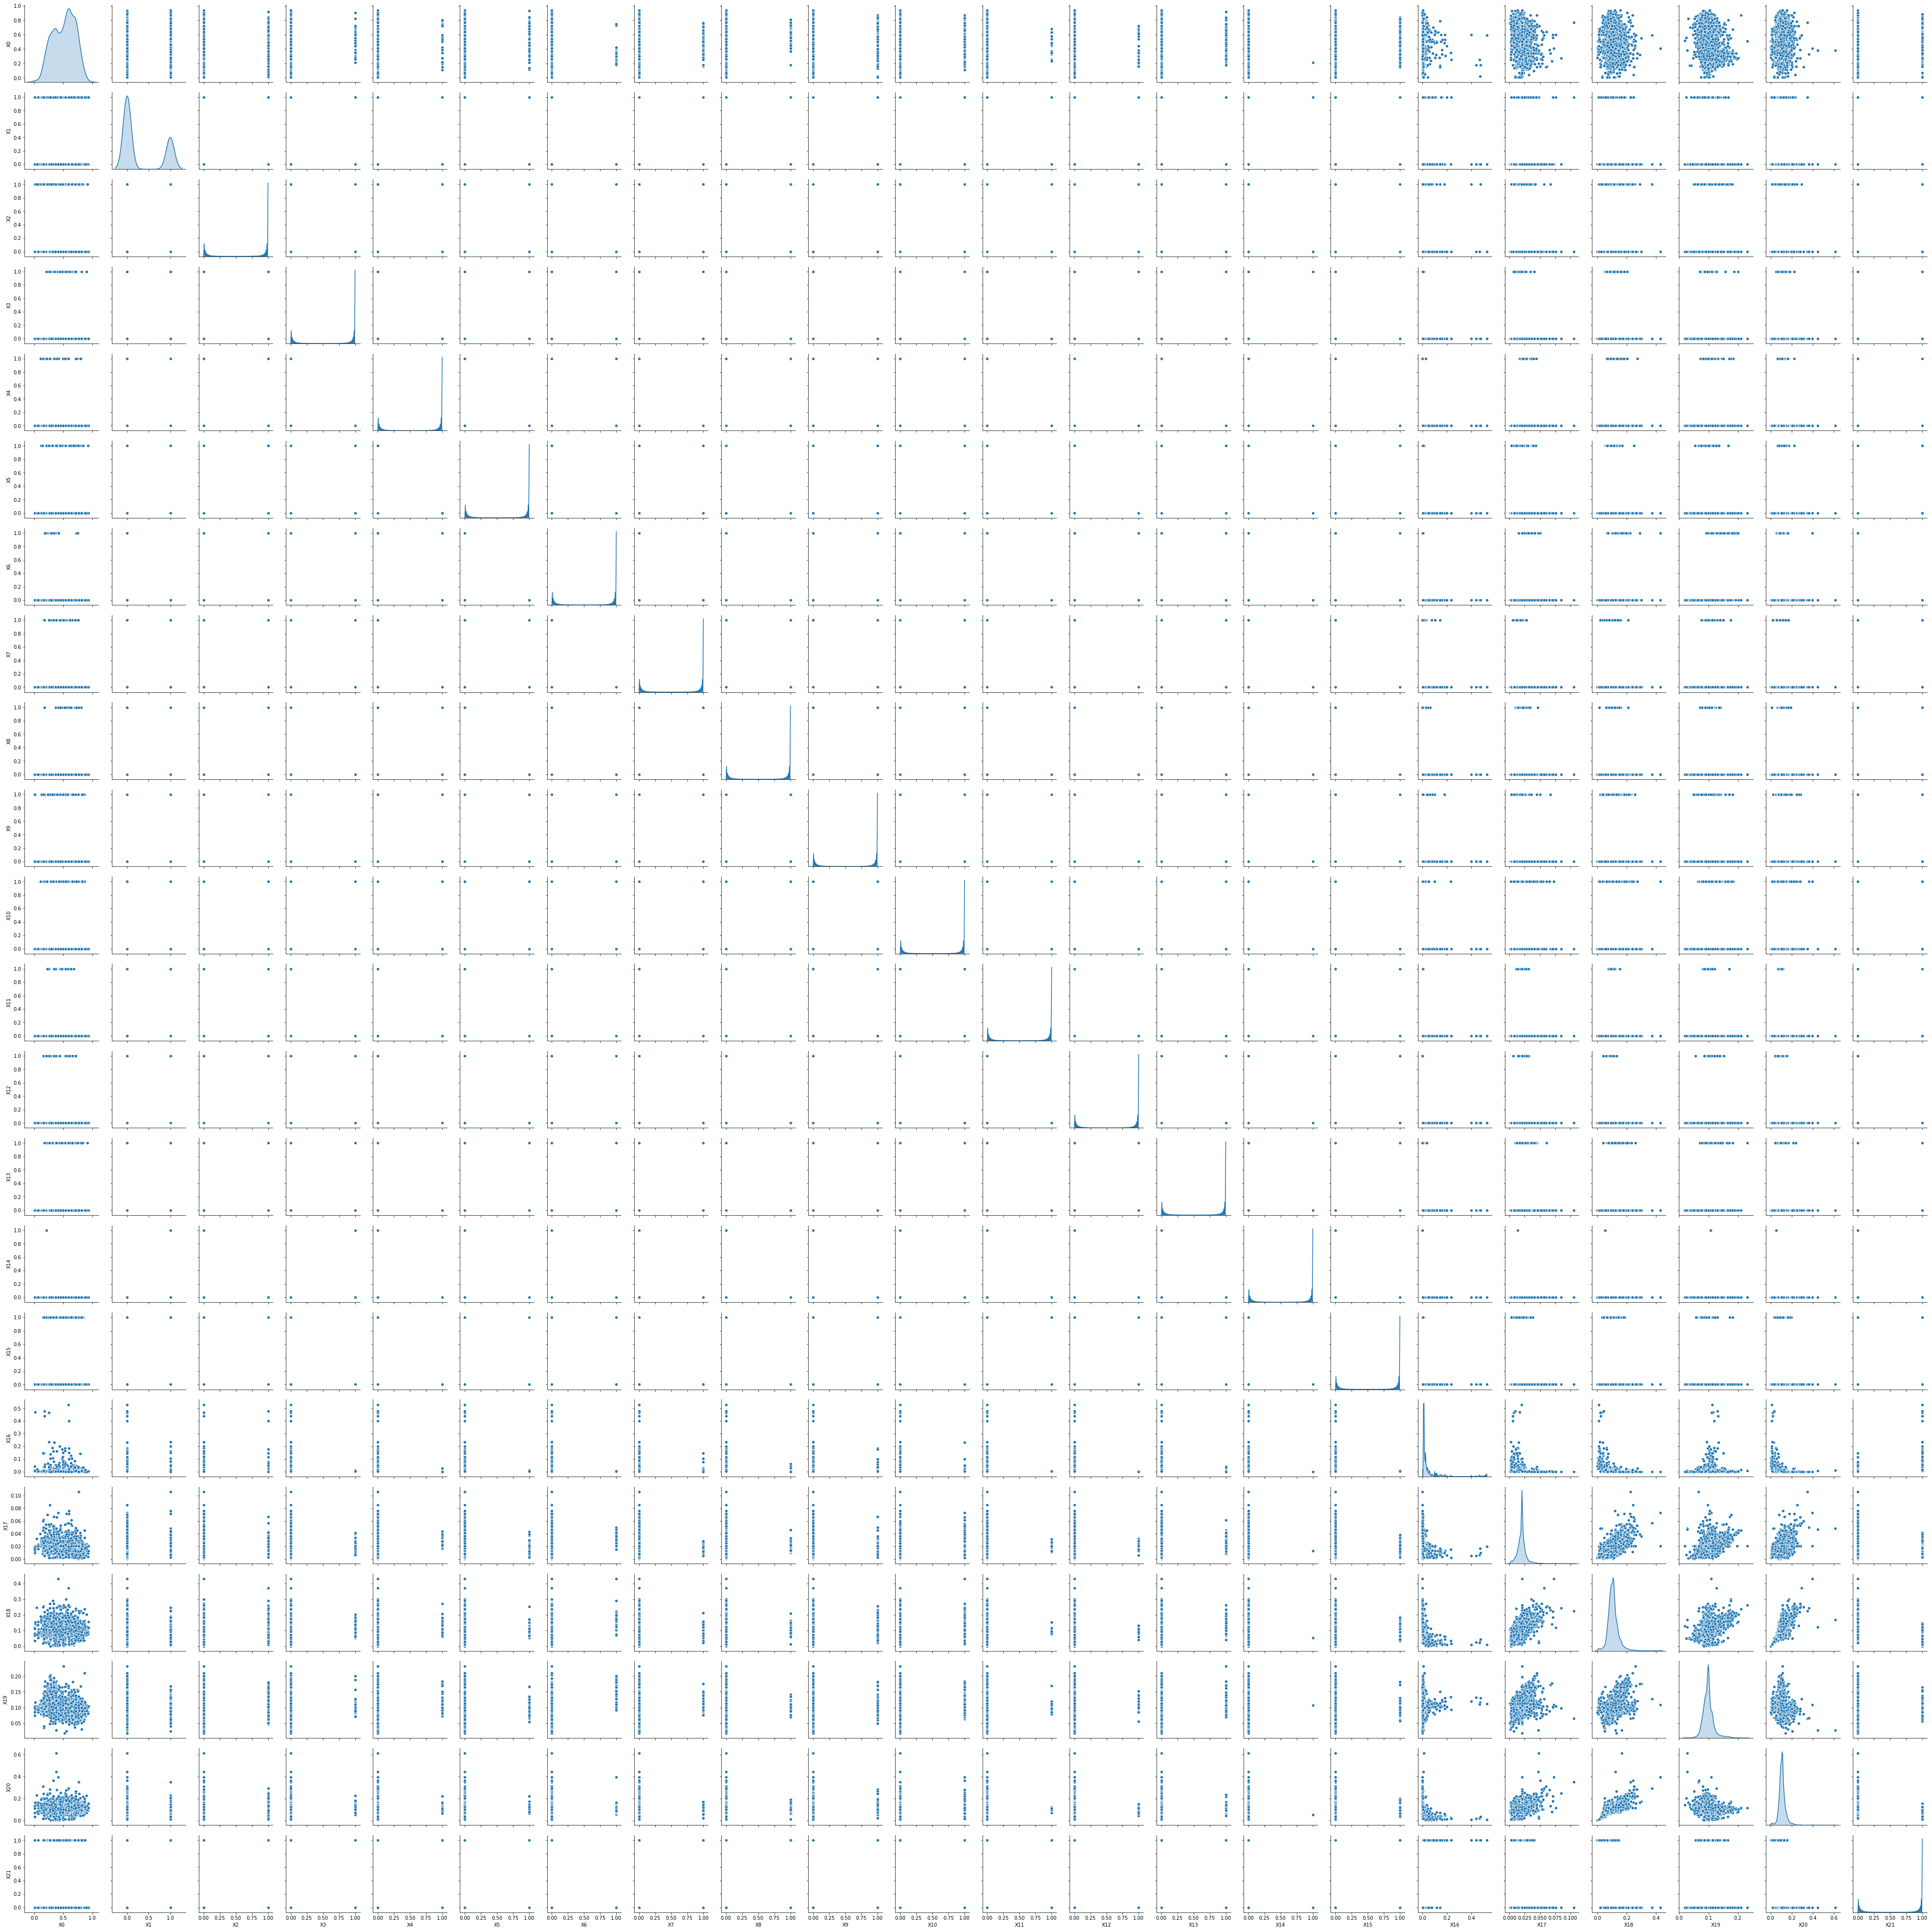

In [102]:
import seaborn as sns

sns.pairplot(df, diag_kind="kde")

Looking the plot of each feature, we see that they are some features with similar behavior. To visualize better these trends, we will plot them in histograms.

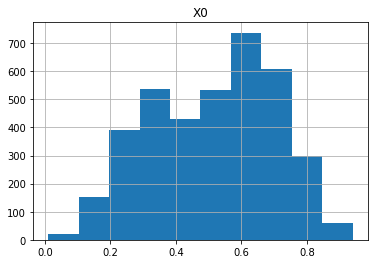

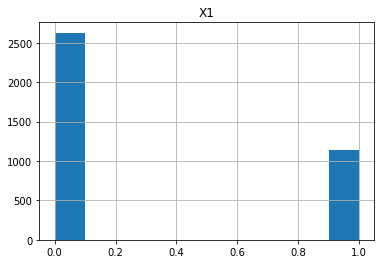

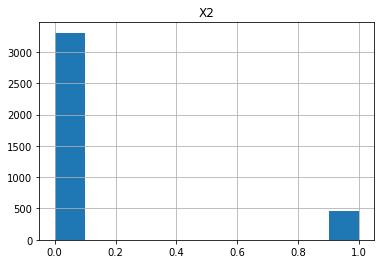

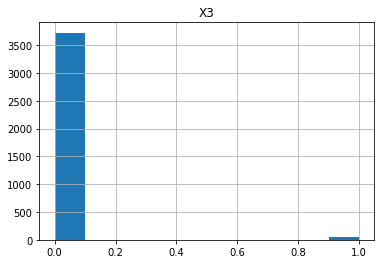

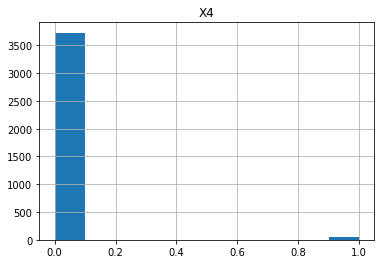

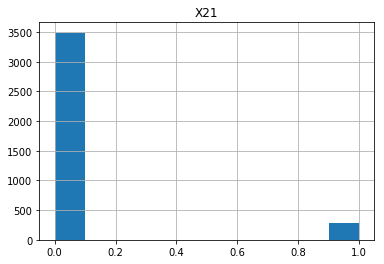

In [103]:
feat=['X0','X1','X2','X3','X4','X21']
for i in feat:
    df.hist(column=i)

From X0 to X15, we can see they are binary features. So, from X16 to X20, they are continuous variables.

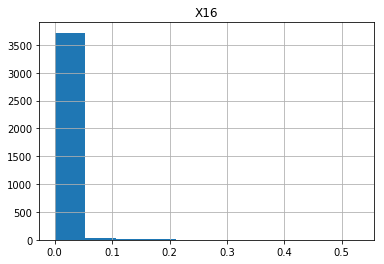

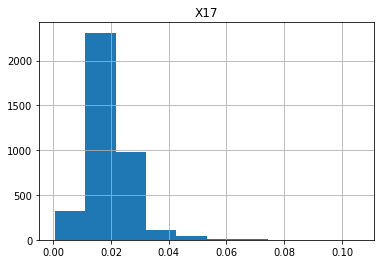

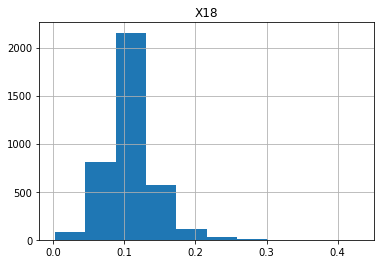

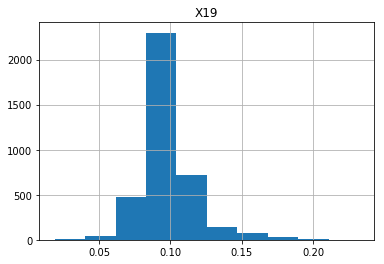

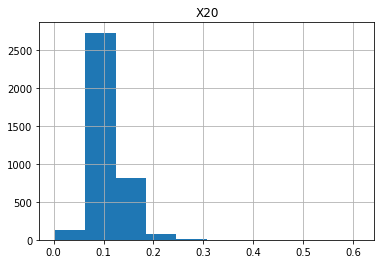

In [104]:

feat=['X16','X17','X18','X19','X20']
for i in feat:
    df.hist(column=i)

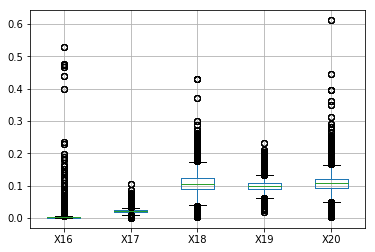

In [105]:
feat=['X16','X17','X18','X19','X20']
for i in feat:
    df.boxplot(column=feat)

Looking the continuous values in the features, we can know we need some normalization to use them in our models later.

## 3) Visualizing the dataset

After seeing some variables' plots, we can group them up for future analysis. Now, we like to plot the dataset but the amount of features involved is a problem. However, we can make use of some techniques to convert high dimensional data to low dimensional data. One is called Principal Component Analysis, which will choose the most important features from the dataset that are responsible for maximum variance in the output. Another technique is T-SNE, which contrary to PCA it is not a mathematical technique but a probabilistic one.

First, we will make a standarization to the dataset. We can't use Standardization because it is not good if the data is not normally distributed (we saw we have features which are not normal) and Normalization because it gets influenced heavily by outliers (the case of our problem). Hence, we will use Robust Scaler, that as a Normalization, which shrinks the range such that the range is now between 0 and 1 but instead uses the interquartile range, so that it is robust to outliers.

In [106]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)

# Scale the train set
X = transformer.transform(X)

### 3.1) PCA

The objective of PCA or Principal Component Analysis is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. This way we can represent a dataset with many features in a graphic in 2d. To use this technique we will use scikit-learn package.

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_result = pca.fit_transform(X)

#creating a new dataframe
dfAux=pd.DataFrame(data=df.X21)
dfAux['pca-one'] = pca_result[:,0]
#we will use this later
dfAux['pca-two'] = pca_result[:,0]

print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.96700037]


We will change the parameters of the PCA function to see what is the difference between them. A reminder, we need to include at least 95% variance in the dataset using these principal components. Below, we can see, even if we change the number of components, the variation of the variance of each component doesn't vary.

In [108]:
list_variance=[]
for i in range(2,10):
    pca = PCA(n_components=i)
    pca.fit(X)
    print("using {} components ".format(i))
    print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    list_variance.append(sum(pca.explained_variance_ratio_))
    print('Total percentage of the classification information: ',sum(pca.explained_variance_ratio_))
    print("--------------------------------------------------------------")

using 2 components 
Explained variation per principal component: [0.96700037 0.01493593]
Total percentage of the classification information:  0.9819362935576788
--------------------------------------------------------------
using 3 components 
Explained variation per principal component: [0.96700037 0.01493593 0.0082886 ]
Total percentage of the classification information:  0.9902248944203118
--------------------------------------------------------------
using 4 components 
Explained variation per principal component: [0.96700037 0.01493593 0.0082886  0.00419342]
Total percentage of the classification information:  0.9944183128813886
--------------------------------------------------------------
using 5 components 
Explained variation per principal component: [0.96700037 0.01493593 0.0082886  0.00419342 0.00193806]
Total percentage of the classification information:  0.9963563759324715
--------------------------------------------------------------
using 6 components 
Explained variatio

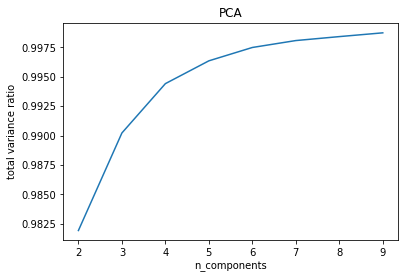

In [109]:
plt.plot(np.arange(2,10),list_variance)

plt.title('PCA')
plt.xlabel('n_components')
plt.ylabel('total variance ratio')
# plot train scores

plt.show()

### 3.2) T-SNE

Now, we will use T-SNE technique which is an algorithm to make good representations of the dataset without losing any variance of the data in the process. T-SNE Is a dimension reduction technique similar in some aspects to Principal Component Analysis (PCA), used to visualize 'n' variables into 2. Same as PCA, we will use scikit package to make use of this technique.

In [110]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X)
tsne_results

array([[ -9.52649 ,  37.92704 ],
       [-52.612186,  22.360825],
       [-53.85381 ,  13.364344],
       ...,
       [ 16.38668 , -68.889465],
       [ 50.65959 ,  27.382614],
       [ -6.334821, -19.245144]], dtype=float32)

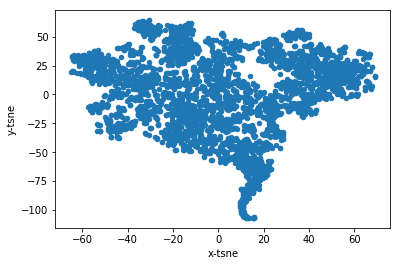

In [111]:
dfAux['x-tsne'] = tsne_results[:,0]
dfAux['y-tsne'] = tsne_results[:,1]
dfAux.plot('x-tsne','y-tsne',kind='scatter')

Looking the scatter plot above, we can see already that there is a bunch of data which is more likely to be outliers. Let's see if we can tune the parameters to see better clusters in the graphic. According to the documentation, we need to change the parameter perplexity to see a change in the plot. 

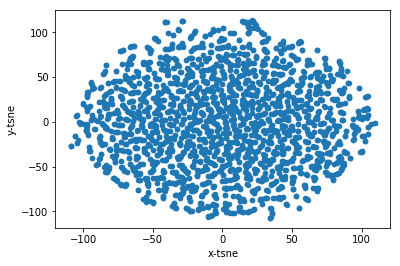

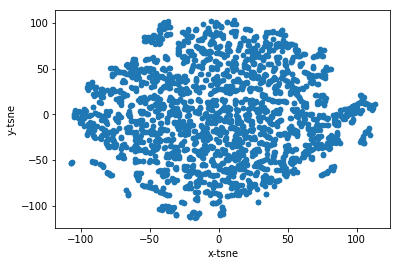

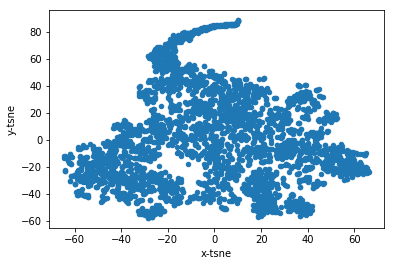

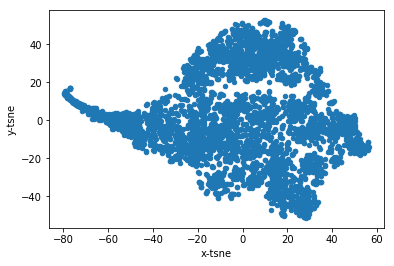

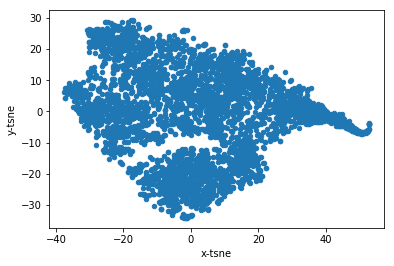

In [112]:
perplexities =[2,5,30,50,100]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity= perp)
    tsne_results = tsne.fit_transform(X)
    dfAux['x-tsne'] = tsne_results[:,0]
    dfAux['y-tsne'] = tsne_results[:,1]
    dfAux.plot('x-tsne','y-tsne',kind='scatter')

The first plot seems a little messy and we don't see the amount of cluster we need. However, after having perplexity equal to 30, we see more clearly the cluster are formed. Next, we are going to use to different approaches to identify outliers. First, we will group up into clusters. To do that we will use KMeans, Agglomerative Clustering and DBSCAN. Next, we will use techniques to identify anomaly detection in the dataset. These techniques are EllipticEnvelope, OneClassSVM and IsolationForest. At the end, we will apply predictive models such as Logistic Regression and Random Forest to identify future outliers in different datasets.

## 4) Clustering Analysis

First, we will use an upside-down tree whose branches are all converging into a trunk. This hierarchical clustering tree is a dendrogram, which will be useful to know how many clusters we need to group our data points.

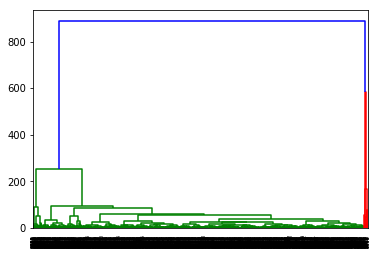

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
D_dendro = sch.dendrogram(sch.linkage(X, method='ward'))


As we can see in the dendrogram above, we need two or three clusters to group up our data. The one in the left side, because there are group by in one cluster, they can be the inliers (most of the data is into this cluster) and the one in the right side would be the outliers. In theory, there are 3 approaches to group the data into hierarchical clustering. These are k-means and agglomerative clustering. Then, we will apply each one of these techniques and we will compare each other.

### 4.1) AgglomerativeClustering

In [114]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score,adjusted_mutual_info_score
from sklearn.metrics import silhouette_score

n_clusters_list=[2,3,5,8,10,15,20,30,50,80,100]
list_cust_pred=[]
for n_cluster in n_clusters_list:
    clustering = AgglomerativeClustering(n_clusters=n_cluster, affinity='l2',linkage='complete')
    cust_pred=clustering.fit_predict(X)
    list_cust_pred.append(cust_pred)
    print('The score using {} clusters is: '.format(n_cluster))
    print("The average silhouette_score is:", silhouette_score(X, cust_pred))
    
    print('-----------------------------------')

The score using 2 clusters is: 
The average silhouette_score is: 0.9775474845057948
-----------------------------------
The score using 3 clusters is: 
The average silhouette_score is: 0.9369180041787871
-----------------------------------
The score using 5 clusters is: 
The average silhouette_score is: 0.9256924329096247
-----------------------------------
The score using 8 clusters is: 
The average silhouette_score is: 0.8013349581430379
-----------------------------------
The score using 10 clusters is: 
The average silhouette_score is: 0.7693922560021365
-----------------------------------
The score using 15 clusters is: 
The average silhouette_score is: 0.6157404767088513
-----------------------------------
The score using 20 clusters is: 
The average silhouette_score is: 0.3938437661923237
-----------------------------------
The score using 30 clusters is: 
The average silhouette_score is: 0.21207173933303275
-----------------------------------
The score using 50 clusters is: 
Th

According to the dendrogram above, we can use 2, 3 or even 5 clusters. We decide to use three clusters to group up the data points. Also, we are using silhouette score to check up how good are our clusters formed. Silhouette score is a neat way to find out the optimum value for any clustering method. Below, we will see where the outliers are in our graphic.

In [115]:
#using 3 clusters
unique, counts = np.unique(list_cust_pred[1], return_counts=True)
print(dict(zip(unique, counts)))

outliers=np.where(list_cust_pred[1] == 2)[0]
pred_Aux = np.zeros(y.shape)
pred_Aux[outliers]=1

print('NMI score is: ', normalized_mutual_info_score(pred_Aux,y))
print('AMI score is: ', adjusted_mutual_info_score(pred_Aux,y))
    

{0: 33, 1: 6, 2: 3733}
NMI score is:  0.17103245906250997
AMI score is:  0.07889021187287017


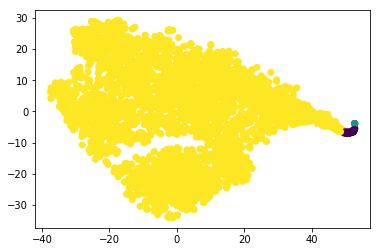

In [116]:

plt.scatter(dfAux.iloc[:,3], dfAux.iloc[:,4], c=list_cust_pred[1]);

Next, we will use another method, k-Means.

### 4.2) K-Means

In [117]:
from sklearn.cluster import KMeans
list_cust_predKM=[]
for n_cluster in n_clusters_list:
    kmeans = KMeans(n_clusters=n_cluster,n_init=50,random_state=10)
    kmean_pred=kmeans.fit_predict(X)
    list_cust_predKM.append(kmean_pred)
    print('The score using {} clusters is: '.format(n_cluster))
    print("The average silhouette_score is :", silhouette_score(X, kmean_pred))

    print('-----------------------------------')

The score using 2 clusters is: 
The average silhouette_score is : 0.961573149378599
-----------------------------------
The score using 3 clusters is: 
The average silhouette_score is : 0.9354454439757045
-----------------------------------
The score using 5 clusters is: 
The average silhouette_score is : 0.7939826144686148
-----------------------------------
The score using 8 clusters is: 
The average silhouette_score is : 0.3077321246535633
-----------------------------------
The score using 10 clusters is: 
The average silhouette_score is : 0.24107278232374943
-----------------------------------
The score using 15 clusters is: 
The average silhouette_score is : 0.19243098183560478
-----------------------------------
The score using 20 clusters is: 
The average silhouette_score is : 0.14282746594800333
-----------------------------------
The score using 30 clusters is: 
The average silhouette_score is : 0.12755873692407155
-----------------------------------
The score using 50 cluste

In [118]:
#using 3 clusters
unique, counts = np.unique(list_cust_predKM[1], return_counts=True)
print(dict(zip(unique, counts)))

outliers=np.where(list_cust_pred[1] == 0)[0]
pred_Aux = np.zeros(y.shape)
pred_Aux[outliers]=1

print('NMI score is: ', normalized_mutual_info_score(pred_Aux,y))
print('AMI score is: ', adjusted_mutual_info_score(pred_Aux,y))

{0: 3731, 1: 6, 2: 35}
NMI score is:  0.14776295040938242
AMI score is:  0.06351896217988141


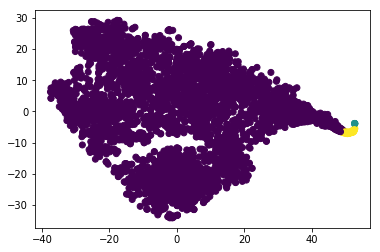

In [119]:
plt.scatter(dfAux.iloc[:,3], dfAux.iloc[:,4], c=list_cust_predKM[1]);

How well did they do using NMI and AMI scores? We obtained not good results. Even if we achieved good results in silhouette score, using 500 minimun of samples, we achieved low scores calues. These measures indicates correlation between the values we obtained and the truth values. It would be perfect if we obtained results close to 1 (which indicates a perfect correlation)

## 5) Anomaly Detection

This techniques are useful to find anomaly detection in any dataset. Scikit-learn package allows us to use different algorithms of anomaly detection. Outlier detection is similar to novelty detection in the sense that the goal is to separate a core of regular observations from some polluting ones, called outliers. Yet, in the case of outlier detection, we don’t have a clean data set representing the population of regular observations that can be used to train any tool. Because we don't know the nature of the variables in our dataset, we should considere our dataset as not clean so these methode will be really useful. The methods we will use are EllipticEnvelope, OneClassSVM and we will compare each other using roc_auc score.

### 5.1)Elliptic Envelope

In [120]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.1
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(X)

# Binary prediction of normal vs. outlier
predEll = ell.predict(X)
sum(predEll == -1)  # Outlier points are predicted as -1

378

In [121]:
unique, counts = np.unique(predEll, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 378, 1: 3394}


In [122]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
yOutliers=np.where(y == 1)[0]

{0: 3488, 1: 284}


<Figure size 432x288 with 0 Axes>

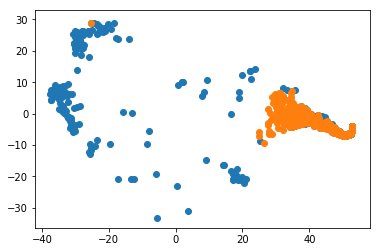

<Figure size 432x288 with 0 Axes>

In [123]:
predEllOutliers=np.where(predEll == -1)[0]
plt.scatter(dfAux.iloc[predEllOutliers,3], dfAux.iloc[predEllOutliers,4], cmap='hsv')
plt.scatter(dfAux.iloc[yOutliers,3], dfAux.iloc[yOutliers,4], cmap='hsv')
plt.figure()

We need to make use of a dummy variable y1 to change the ground-truth label and make the comparisons with the predict values. After making this, we are ready to make the comparison and get the scores for this model.

In [124]:
y1=np.array(y)
y1[y1==1] = -1
y1[y1==0] = 1
y1

array([ 1,  1,  1, ..., -1,  1,  1], dtype=int64)

In [125]:
pred_Aux = np.zeros(y.shape)
pred_Aux[predEllOutliers]=1
pred_Aux

array([0., 0., 0., ..., 0., 0., 0.])

In [126]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,recall_score, precision_score,average_precision_score

print('NMI score is: ', normalized_mutual_info_score(pred_Aux,y))
print('AMI score is: ', adjusted_mutual_info_score(pred_Aux,y))


print ('ROC AUC score is: ', roc_auc_score(y1, predEll))

NMI score is:  0.18282765611826696
AMI score is:  0.16526714699471265
ROC AUC score is:  0.7409205808243959


Above, we can see the scores of this model. To Sum it up, we see a low performance. Looking at roc auc score is a pretty low. Why? This is because ROC AUC are appropriate when the observations are balanced between each class, whereas other metrics such as NMI and AMI are appropriate for imbalanced datasets. This is our case.

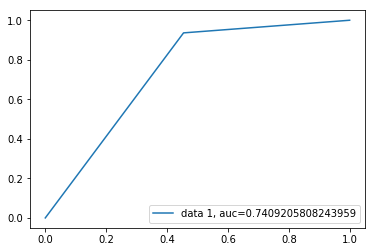

In [127]:

fpr, tpr, _ = roc_curve(y1,  predEll)
auc = roc_auc_score(y1, predEll)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend()
plt.show()

### 5.2) OneClassSVM.

In [128]:
from sklearn.svm import OneClassSVM
nu=0.1
ocSvm = OneClassSVM(nu=nu)
ocSvm.fit(X)

# Binary prediction of normal vs. outlier
predocSvm = ocSvm.predict(X)
sum(predocSvm == -1)

380

<Figure size 432x288 with 0 Axes>

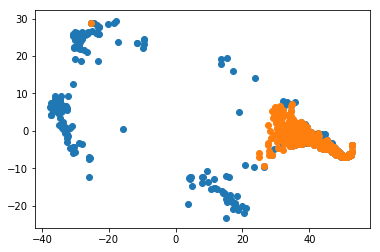

<Figure size 432x288 with 0 Axes>

In [129]:
predocSvmOutliers=np.where(predocSvm == -1)[0]
plt.scatter(dfAux.iloc[predocSvmOutliers,3], dfAux.iloc[predocSvmOutliers,4], cmap='hsv')
plt.scatter(dfAux.iloc[yOutliers,3], dfAux.iloc[yOutliers,4], cmap='hsv')
plt.figure()

In [130]:
pred_Aux = np.zeros(y.shape)
pred_Aux[predocSvmOutliers]=1
pred_Aux

array([0., 0., 0., ..., 1., 0., 0.])

In [131]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

print('NMI score is: ', normalized_mutual_info_score(pred_Aux,y))
print('AMI score is: ', adjusted_mutual_info_score(pred_Aux,y))

print ('ROC AUC score is: ', roc_auc_score(y1, predocSvm))

NMI score is:  0.1765323269684359
AMI score is:  0.15927881664928203
ROC AUC score is:  0.7368260595684197


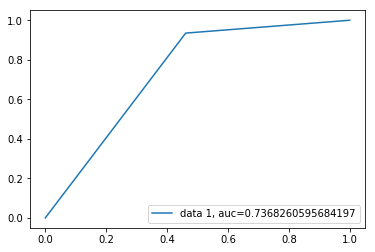

In [132]:
fpr, tpr, _ = roc_curve(y1,  predocSvm)
auc = roc_auc_score(y1, predocSvm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend()
plt.show()

In [133]:
print('NMI score using EllipticEnvelope is: ', normalized_mutual_info_score(predEll,y1))
print('AMI score using EllipticEnvelope is: ', adjusted_mutual_info_score(predEll,y1))
print('NMI score using OneClassSVM is: ', normalized_mutual_info_score(predocSvm,y1))
print('AMI score using OneClassSVM is: ', adjusted_mutual_info_score(predocSvm,y1))

NMI score using EllipticEnvelope is:  0.18282765611826696
AMI score using EllipticEnvelope is:  0.16526714699471265
NMI score using OneClassSVM is:  0.1765323269684359
AMI score using OneClassSVM is:  0.15927881664928203


In [134]:
print ('ROC AUC score is: ', roc_auc_score(y1, predEll))
print ('ROC AUC score is: ', roc_auc_score(y1, predocSvm))

ROC AUC score is:  0.7409205808243959
ROC AUC score is:  0.7368260595684197


We don't see any improvement in finding the right outliers. We state that If we want to increase the score, our dataset doesn't help. This is because we are in a scenario the number of observations belonging to one class is significantly lower than those belonging to the other classes. Hence, to improve our scores, we need to use other techniques. We need to come across imbalanced class distribution.

## 6) Imbalanced Classification

The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. That's why we need of imbalanced techniques which will be either increasing the frequency of the minority class or decreasing the frequency of the majority class.

First, we need to read our test dataset to compare our models if they are good enough and we are not in a case where we develop a biased predictive model.

In [135]:
dfTest=pd.read_csv('C:/Users/alex_/Desktop/college/DS630-MachineLear/ann-test.data',header=None,delimiter=' ',prefix='X')

dfTest=dfTest.drop('X22', axis=1)
dfTest=dfTest.drop('X23', axis=1)
dfTest.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,0.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.028,0.111,0.131,0.085,2
1,0.32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0013,0.019,0.084,0.078,0.107,3
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0000,0.031,0.239,0.100,0.239,3
3,0.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0010,0.018,0.087,0.088,0.099,3
4,0.22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.0004,0.022,0.134,0.135,0.099,3


In [136]:
dfTest['X21'] = dfTest['X21'].map({3: 0, 2: 1, 1:1})
X_test = dfTest.iloc[:,0:21].values
y_test= dfTest.iloc[:, 21].values

# Scale the test set
X_test = transformer.transform(X_test)

### 6.1) Random Under Sampling

Now, we will use Random Undersampling which aim to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out. Let's take a look how it performs when we uses Logistic Regression and Random Forest.

#### Using Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegressionCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


undersample_pipe=make_pipeline(RandomUnderSampler(),LogisticRegressionCV())
scores=cross_validate(undersample_pipe,X,y,cv=5,scoring='roc_auc')

In [138]:
print('ROC AUC score is: ',scores['test_score'].mean())

ROC AUC score is:  0.9915961549238208


In [139]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 284, 1: 284})


In [140]:
from sklearn.metrics import f1_score

logReg=LogisticRegressionCV().fit(X_res,y_res)
y_pred= logReg.predict(X_test)
auc_rus_lcv=roc_auc_score(y_test, y_pred)


In [141]:
print ('AUC score is: ',auc_rus_lcv)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_lg_rus, tpr_lg_rus, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.9728508495909377
NMI is:  0.6334163510178785
AMI is:  0.5614129315085349


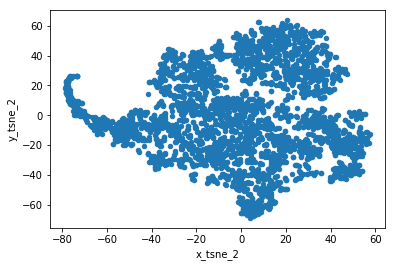

In [142]:
dfTest_Aux=pd.DataFrame(data=dfTest.X21)

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_test)
dfTest_Aux['x_tsne_2'] = tsne_results[:,0]
dfTest_Aux['y_tsne_2'] = tsne_results[:,1]
dfTest_Aux.plot('x_tsne_2','y_tsne_2',kind='scatter')

In [143]:
yOutliers_test=np.where(dfTest_Aux.iloc[:,0].values == 1)[0]
yOutliers_test.shape

(250,)

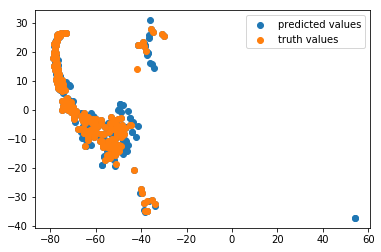

In [144]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()



#### Using Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
undersample_pipeRF=make_pipeline(RandomUnderSampler(),RandomForestClassifier())
scoresRF=cross_validate(undersample_pipeRF,X,y,cv=5,scoring='roc_auc')



In [146]:
print('ROC AUC score is: ',scoresRF['test_score'].mean())

ROC AUC score is:  0.9966849011601285


In [147]:
rfReg=RandomForestClassifier().fit(X_res,y_res)
y_pred= rfReg.predict(X_test)
auc_rus_rf=roc_auc_score(y_test, y_pred)


In [148]:
print ('AUC score is: ',auc_rus_rf)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_rf_rus, tpr_rf_rus, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.9856161107614853
NMI is:  0.7396939223666895
AMI is:  0.6829403531823026


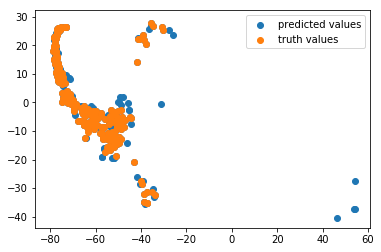

In [149]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

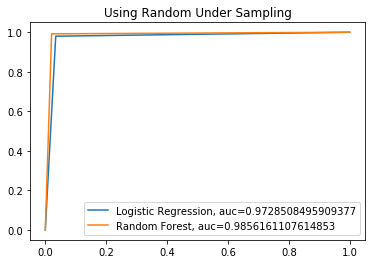

In [150]:
plt.title('Using Random Under Sampling')
plt.plot(fpr_lg_rus, tpr_lg_rus,label="Logistic Regression, auc="+str(auc_rus_lcv))
plt.plot(fpr_rf_rus, tpr_rf_rus,label="Random Forest, auc="+str(auc_rus_rf))
plt.legend()
plt.show()

Another technique is Random Over Sampling which will increase the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. Again, we will use Logistic Regression and Random Forest to see how improve the roc_auc score.

### 6.2) Random Over Sampling

In [151]:
from imblearn.over_sampling import RandomOverSampler
oversample_pipeLR_ros=make_pipeline(RandomOverSampler(),LogisticRegressionCV())
scoresLR_ros=cross_validate(oversample_pipeLR_ros,X,y,cv=5,scoring='roc_auc')

In [152]:
print('ROC AUC score is: ',scoresLR_ros['test_score'].mean())

ROC AUC score is:  0.9842050540694004


In [153]:
rus = RandomOverSampler()
X_ros, y_ros = rus.fit_resample(X, y)

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0: 3488, 1: 3488})


#### Using Logistic Regression

In [154]:
logReg_ros=LogisticRegressionCV().fit(X_ros,y_ros)
y_pred= logReg_ros.predict(X_test)
auc_ros_log=roc_auc_score(y_test, y_pred)


In [155]:
print ('AUC score is: ',auc_ros_log)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_lg_ros, tpr_lg_ros, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.981210824417873
NMI is:  0.6787772017509788
AMI is:  0.6086837111287023


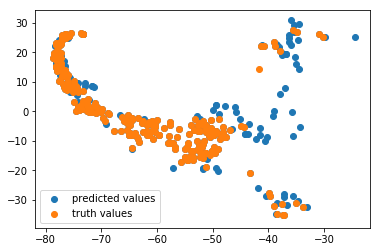

In [156]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

#### Using Random Forest

In [157]:
oversample_pipeRF_ros=make_pipeline(RandomOverSampler(),RandomForestClassifier())
scoresRF_ros=cross_validate(oversample_pipeRF_ros,X,y,cv=5,scoring='roc_auc')

In [158]:
print('ROC AUC score is: ',scoresRF_ros['test_score'].mean())

ROC AUC score is:  0.9997248507121215


In [159]:
rfReg_ros=RandomForestClassifier().fit(X_res,y_res)
y_pred= rfReg_ros.predict(X_test)
auc_ros_rf=roc_auc_score(y_test, y_pred)
print ('AUC score is: ',auc_ros_rf)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_rf_ros, tpr_rf_ros, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.9858854625550661
NMI is:  0.7210107286063498
AMI is:  0.6571913767253239


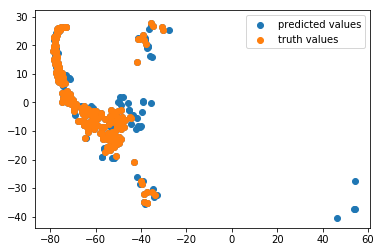

In [160]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

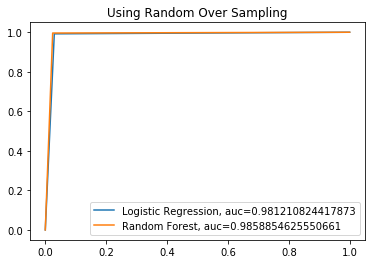

In [161]:
plt.title('Using Random Over Sampling')
plt.plot(fpr_lg_ros, tpr_lg_ros,label="Logistic Regression, auc="+str(auc_ros_log))
plt.plot(fpr_rf_ros, tpr_rf_ros,label="Random Forest, auc="+str(auc_ros_rf))
plt.legend()
plt.show()

### 6.3) SMOTE

But reducing or augmenting the data, even randomly, could cause overfitting. To avoid this, we will use SMOTE (Synthetic Minority Over-sampling Technique). This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. 

#### Using Logistic Regression

In [162]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
smote_pipeLR=make_pipeline(SMOTE(),LogisticRegressionCV())
scoresLR_smo=cross_val_score(smote_pipeLR,X,y,cv=5,scoring='roc_auc')


In [163]:
print(np.mean(scoresLR_smo))

0.9892191610028596


In [164]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)

logReg_smt=LogisticRegressionCV().fit(X_smt,y_smt)
y_pred= logReg_smt.predict(X_test)
auc_smote_log=roc_auc_score(y_test, y_pred)


In [165]:
print ('AUC score is: ',auc_smote_log)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_lg_smo, tpr_lg_smo, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.981997482693518
NMI is:  0.6887688339047344
AMI is:  0.6207380220260414


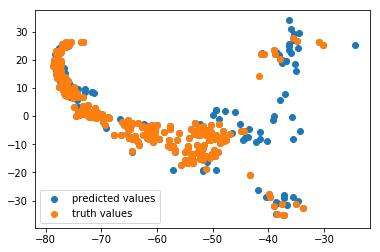

In [166]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

#### Using Random Forest

In [167]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
smote_pipeRF=make_pipeline(SMOTE(),RandomForestClassifier())
scoresRF_smo=cross_val_score(smote_pipeLR,X,y,cv=5,scoring='roc_auc')


In [168]:
scoresRF_smo

array([0.98363746, 0.95103805, 0.9970844 , 0.98884946, 0.9889834 ])

In [169]:
rfReg_smot=RandomForestClassifier().fit(X_res,y_res)
y_pred= rfReg_smot.predict(X_test)
auc_smote_rf=roc_auc_score(y_test, y_pred)
print ('AUC score is: ',auc_smote_rf)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_rf_smo, tpr_rf_smo, _ = roc_curve(y_test,  y_pred)

AUC score is:  0.9848294524858402
NMI is:  0.7278510272282624
AMI is:  0.668369338944918


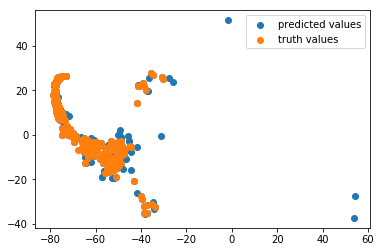

In [170]:
predisForOutliers=np.where(y_pred == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

Let's see if we can improve even better our model, using Grid Search

## * GridSearchCV

Grid search is a method to perform hyper-parameter optimization, so it finds the best combination of hyper-parameters for a given model. In this case, we will apply it in our smote data to obtain the best model in Logistic Regression and Random Forest.

### ** Logistic Regression

In [171]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
ps_lg = {"Cs": [100,50,30,10, 5,2,1],
     'class_weight':['balanced'],
      'solver':['newton-cg']}

f1sc = make_scorer(roc_auc_score)

gr_sch_lg = GridSearchCV(estimator=LogisticRegressionCV(), param_grid=ps_lg, scoring=f1sc)
gr_sch_lg.fit(X_smt, y_smt)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'Cs': [100, 50, 30, 10, 5, 2, 1], 'class_weight': ['balanced'], 'solver': ['newton-cg']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [172]:
print (gr_sch_lg.best_params_)
print(gr_sch_lg.score(X_smt,y_smt))

{'Cs': 2, 'class_weight': 'balanced', 'solver': 'newton-cg'}
0.9882454128440367


In [173]:
y_pred_lg_grsch= gr_sch_lg.predict(X_test)
auc_smot_lg_gs=roc_auc_score(y_test, y_pred_lg_grsch)
print('AUC score is: ',auc_smot_lg_gs)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred_lg_grsch))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred))

fpr_lg_smo_gs_1, tpr_lg_smo_gs_1, _ = roc_curve(y_test,  y_pred_lg_grsch)

AUC score is:  0.9821548143486469
NMI is:  0.6908088702558562
AMI is:  0.668369338944918


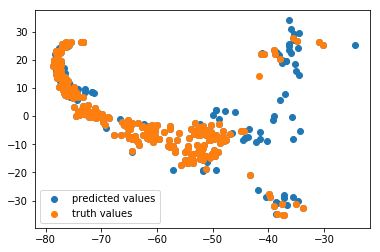

In [174]:
predisForOutliers=np.where(y_pred_lg_grsch == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

### **Random Forest

In [175]:
ps_rf = {"n_estimators": [2,5,10,30,50],
      'criterion':['gini','entropy'],
      'max_features':['sqrt','log2','auto'],
     'class_weight':['balanced', 'balanced_subsample']}

f1sc = make_scorer(roc_auc_score)

gr_sch_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=ps_rf, scoring=f1sc)
gr_sch_rf.fit(X_smt, y_smt)
print (gr_sch_rf.best_params_)
print(gr_sch_rf.score(X_smt,y_smt))

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}
1.0


In [176]:
y_pred_rf_grsch= gr_sch_rf.predict(X_test)
auc_smot_rf_gs=roc_auc_score(y_test, y_pred_rf_grsch)
print('AUC score is: ',auc_smot_rf_gs)
print('NMI is: ',normalized_mutual_info_score(y_test,y_pred_rf_grsch))
print('AMI is: ',adjusted_mutual_info_score(y_test,y_pred_rf_grsch))

fpr_lg_smo_gs, tpr_lg_smo_gs, _ = roc_curve(y_test,  y_pred_rf_grsch)

AUC score is:  0.9822240402769037
NMI is:  0.8346051007401145
AMI is:  0.815324332499451


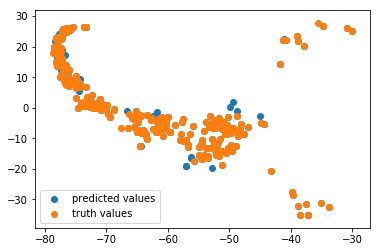

In [177]:
predisForOutliers=np.where(y_pred_rf_grsch == 1)[0]
a=plt.scatter(dfTest_Aux.iloc[predisForOutliers,1], dfTest_Aux.iloc[predisForOutliers,2], cmap='hsv')
b=plt.scatter(dfTest_Aux.iloc[yOutliers_test,1], dfTest_Aux.iloc[yOutliers_test,2], cmap='hsv')
plt.legend((a,b),('predicted values', 'truth values'))
plt.show()

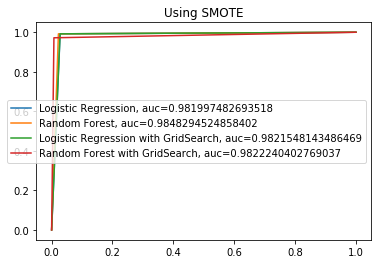

In [178]:
plt.title('Using SMOTE')
plt.plot(fpr_lg_smo, tpr_lg_smo,label="Logistic Regression, auc="+str(auc_smote_log))
plt.plot(fpr_rf_smo, tpr_rf_smo,label="Random Forest, auc="+str(auc_smote_rf))
plt.plot(fpr_lg_smo_gs_1, tpr_lg_smo_gs_1,label="Logistic Regression with GridSearch, auc="+str(auc_smot_lg_gs))
plt.plot(fpr_lg_smo_gs, tpr_lg_smo_gs,label="Random Forest with GridSearch, auc="+str(auc_smot_rf_gs))
plt.legend()
plt.show()

All the Roc curves are very close to each other. That means the Resampling Techniques we used worked very well in our dataset and improve our Roc curves to almost 1. and our average precision to around 0.9. Hence, this approach of balancing the data set with SMOTE and training with a machine learning algorithm (Logistic Regression or Random Forest in this case) on the balanced set significantly impacts the accuracy of the predictive model.

## 7) Conclusion

Thus, to sum it up, while trying to resolve specific business challenges with imbalanced data sets, the classifiers produced by standard machine learning algorithms might not give accurate results. So, first, we need to balanced the data and then apply predictive models. Apart from this kind of data set (to identify rare diseases in medical diagnostics), we can make use of this approach in customer churn or natural disasters.
